# WeatherPy
----


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [25]:
# Set empty lists for data collection
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_num = 1

# Loop through cities and record data for available ones
print('''Beginning Data Retrieval
-----------------------------
''')

for city in cities:
    try:
        response = requests.get(query_url + city).json()

        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing city {city_num} | {city}")
        city_num += 1
        
    except KeyError:
        print('City not found. Skipping...')
        
print('''
-----------------------------
Data Retrieval Complete      
-----------------------------
''')        

Beginning Data Retrieval
-----------------------------

Processing city 1 | padang
Processing city 2 | rikitea
Processing city 3 | castro
Processing city 4 | meulaboh
Processing city 5 | ushuaia
Processing city 6 | hithadhoo
City not found. Skipping...
Processing city 7 | ushtobe
Processing city 8 | tiksi
Processing city 9 | port elizabeth
Processing city 10 | mataura
Processing city 11 | alice town
Processing city 12 | sperkhoyia
Processing city 13 | jamestown
City not found. Skipping...
Processing city 14 | sayyan
Processing city 15 | panguna
Processing city 16 | esperance
City not found. Skipping...
Processing city 17 | dickinson
Processing city 18 | lebu
Processing city 19 | kimbe
Processing city 20 | atuona
Processing city 21 | galeana
Processing city 22 | kapaa
Processing city 23 | san patricio
Processing city 24 | saint-georges
Processing city 25 | hermanus
Processing city 26 | port alfred
Processing city 27 | nara
Processing city 28 | chicama
Processing city 29 | hambantota
Pro

Processing city 237 | fortuna
Processing city 238 | nizhnevartovsk
Processing city 239 | ormara
Processing city 240 | upernavik
Processing city 241 | pitimbu
Processing city 242 | biak
Processing city 243 | tandil
Processing city 244 | hamilton
City not found. Skipping...
City not found. Skipping...
Processing city 245 | leningradskiy
Processing city 246 | roebourne
Processing city 247 | constitucion
Processing city 248 | dalianwan
Processing city 249 | nogales
Processing city 250 | chapayeve
Processing city 251 | karratha
Processing city 252 | kushikino
City not found. Skipping...
Processing city 253 | phalaborwa
Processing city 254 | salta
Processing city 255 | keti bandar
Processing city 256 | onega
Processing city 257 | dalaba
Processing city 258 | aklavik
Processing city 259 | aksha
Processing city 260 | balvi
Processing city 261 | alice springs
Processing city 262 | monrovia
Processing city 263 | taltal
Processing city 264 | aykhal
Processing city 265 | iwaki
Processing city 266 

Processing city 481 | tromso
Processing city 482 | shelburne
Processing city 483 | poya
Processing city 484 | khasan
Processing city 485 | alizai
Processing city 486 | tamale
Processing city 487 | praia da vitoria
Processing city 488 | ferrol
Processing city 489 | palmer
Processing city 490 | kalmunai
Processing city 491 | muroto
Processing city 492 | arman
Processing city 493 | irtyshskiy
Processing city 494 | caloundra
City not found. Skipping...
Processing city 495 | torrington
Processing city 496 | hauterive
Processing city 497 | beaupre
Processing city 498 | uporovo
Processing city 499 | hualmay
Processing city 500 | balkanabat
Processing city 501 | circleville
Processing city 502 | lata
Processing city 503 | andros
Processing city 504 | nador
Processing city 505 | bereda
Processing city 506 | yerbogachen
Processing city 507 | krasnopavlivka
Processing city 508 | awjilah
Processing city 509 | luneburg
Processing city 510 | sasovo
Processing city 511 | kanniyakumari
Processing city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Turn data into dict
city_data = {
    'City': name,
    'Lat': lat,
    'Lng': lon,
    'Max Temp (F)': temp_max,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

# Create df
city_df = pd.DataFrame(city_data)

# Export data into csv
city_df.to_csv(output_data_file)

In [29]:
# Preview df
city_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,77.94,81,99,3.29,ID,1666202426
1,Rikitea,-23.1203,-134.9692,70.12,69,57,17.31,PF,1666202429
2,Castro,-24.7911,-50.0119,72.97,73,39,5.14,BR,1666202149
3,Meulaboh,4.1363,96.1285,76.10,87,100,1.61,ID,1666202432
4,Ushuaia,-54.8000,-68.3000,53.26,37,20,19.57,AR,1666202144


In [30]:
city_stats = city_df.describe()
city_stats

,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,18.930646,19.694703,62.458988,69.852575,56.904085,8.539023,1.666203e+09
std,32.597961,91.309132,19.301530,21.342186,38.117743,6.241277,1.169269e+02
min,-54.800000,-175.200000,-7.870000,5.000000,0.000000,0.000000,1.666202e+09
25%,-7.879300,-65.896900,49.030000,58.500000,19.000000,3.990000,1.666202e+09
50%,22.678300,22.957300,66.920000,75.000000,65.000000,6.910000,1.666203e+09
75%,44.692800,104.479000,77.520000,86.000000,98.000000,11.510000,1.666203e+09
max,78.218600,178.416700,100.620000,100.000000,100.000000,33.040000,1.666203e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
# Check if there are any cities with a humidity > 100%
city_df.loc[city_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date


In [35]:
# No cities come up, so this step is being skipped

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

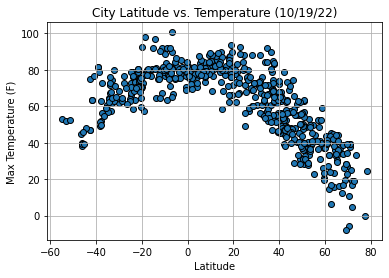

In [42]:
x_axis = city_df['Lat']
y_axis = city_df['Max Temp (F)']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Temperature (10/19/22)')
plt.grid(visible=True)
plt.show()

## Latitude vs. Humidity Plot

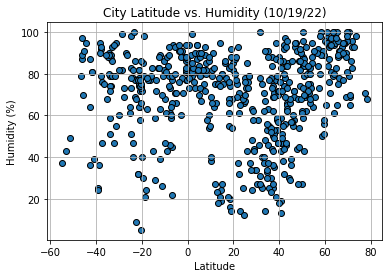

In [43]:
x_axis = city_df['Lat']
y_axis = city_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/19/22)')
plt.grid(visible=True)
plt.show()

## Latitude vs. Cloudiness Plot

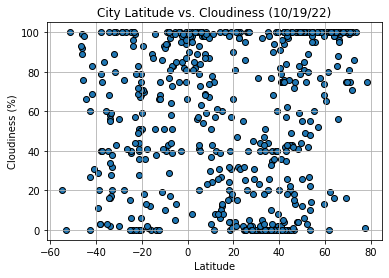

In [44]:
x_axis = city_df['Lat']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/19/22)')
plt.grid(visible=True)
plt.show()

## Latitude vs. Wind Speed Plot

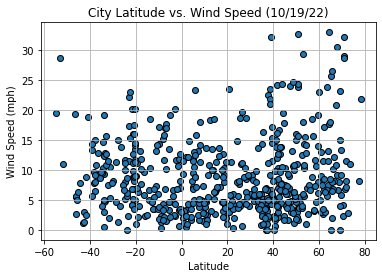

In [45]:
x_axis = city_df['Lat']
y_axis = city_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/19/22)')
plt.grid(visible=True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8532143409297165


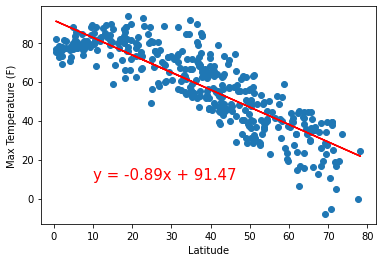

In [56]:
# Set up new df for just Northern Hemisphere cities
north_df = city_df.loc[city_df['Lat'] >= 0]

# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Max Temp (F)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Max Temp (F)']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6908963251970334


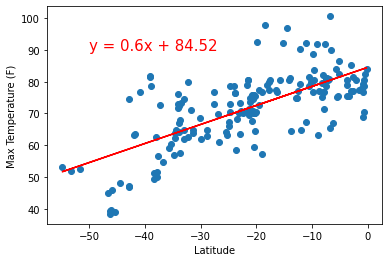

In [65]:
# Set up new df for just Southern Hemisphere cities
south_df = city_df.loc[city_df['Lat'] < 0]

# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Max Temp (F)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Max Temp (F)']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19185155913006569


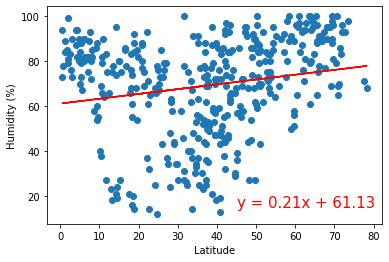

In [68]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.050941983660931486


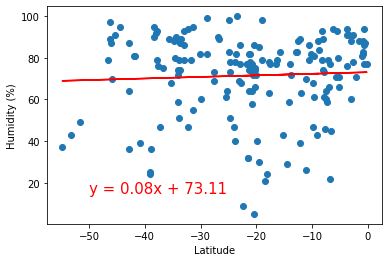

In [70]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19339082735822735


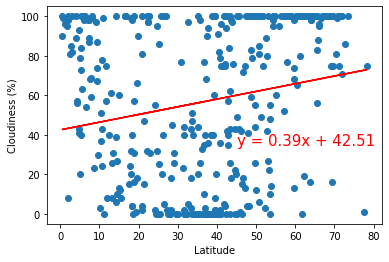

In [81]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21132370819966778


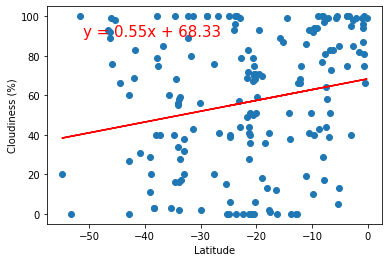

In [76]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-51,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22161797321776436


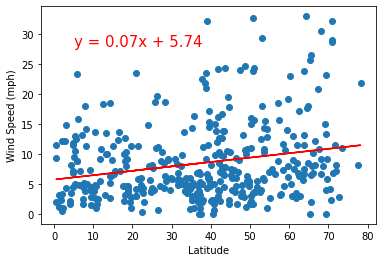

In [85]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16246572603876155


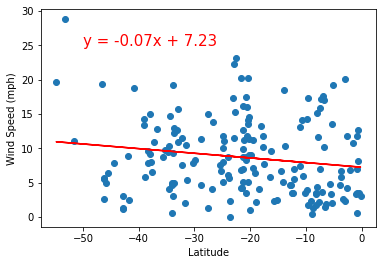

In [78]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()